In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction

The objective of this ETL is to create a table where we can query the prices of the top brands on two e-commerce websites. We can then answer the following questions about the two stores:
- Which of the two stores has the best prices for each of the brands in Saudi Arabia, UAE, Qatar and Kuwait?
- Which of the two stores had more products on sale and deeper discounts on the top brands?
- What's the size of the catalogue for the two stores for the top brands when compared to each other?

# Ounass EDA

In [5]:
ounass = pd.read_json('../resources/ounass.jl', lines=True)
ounass.head(3)

,site,crawl_date,country,url,portal_itemid,product_name,gender,brand,category,subcategory,price,currency,price_discount,sold_out,primary_label,image_url,text
0,Ounass,2022-10-02,sa,https://en-saudi.ounass.com/shop-hunza-g-nancy...,213987753,Nancy One-Piece Swimsuit,Women,Hunza G,clothing,beachwear,825,SAR,None,False,NEW SEASON,"//ounass-prod1.atgcdn.ae/small_light(dw=81,ch=...",Bring a sophisticated vibe to the beach when y...
1,Ounass,2022-10-02,sa,https://en-saudi.ounass.com/shop-saint-laurent...,215055145,Venice Straight-leg Jeans in Denim,Women,SAINT LAURENT,clothing,jeans,"3,550",SAR,None,False,None,"//ounass-prod2.atgcdn.ae/small_light(dw=81,ch=...","Alongside gleaming, metallic ensembles, SAINT ..."
2,Ounass,2022-10-02,sa,https://en-saudi.ounass.com/shop-notebook-lucy...,215441432,Lucy Jumpsuit in Terry Rayon,Women,Notebook,clothing,jumpsuits,"1,000",SAR,None,False,NEW SEASON,"//ounass-prod1.atgcdn.ae/small_light(dw=81,ch=...",The Lucy jumpsuit is a chic alternative to a l...


In [32]:
print("Let's check for duplicates: All values are unique")
print(ounass.duplicated().value_counts())
print('URLs as well')
print(ounass.url.duplicated().value_counts())

Let's check for duplicates: All values are unique
False    129683
dtype: int64
URLs as well
False    129683
Name: url, dtype: int64


In [15]:
print("Let's check for null values: Some brand entries are null and will need to be removed.\
text, price discount and primary labels nulls are expected")
print(ounass.isna().sum())

Let's check for null values: Some brand entries are null and will need to be removed,price discount nulls are expected
site                   0
crawl_date             0
country                0
url                    0
portal_itemid          0
product_name           0
gender                 0
brand                290
category               0
subcategory            0
price                  0
currency               0
price_discount    129259
sold_out               0
primary_label      54864
image_url              0
text                2249
dtype: int64


Country, Gender and Category counts are inline with what is expected


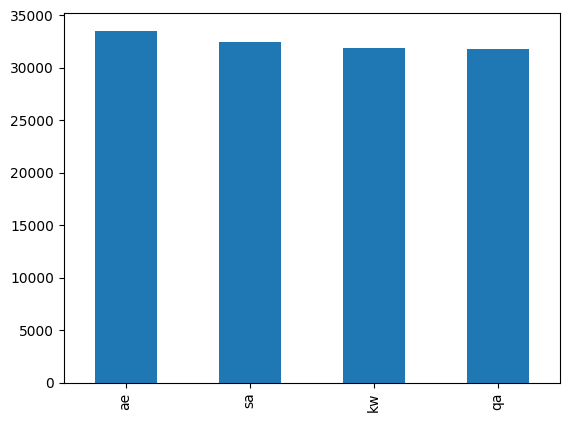

Curated for All and Kids need to be dropped


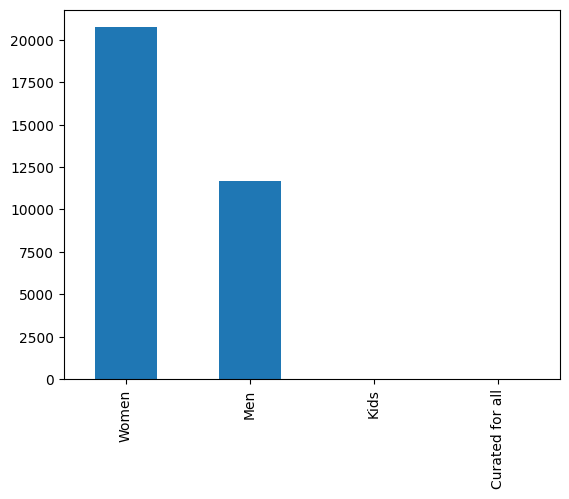

<AxesSubplot:>

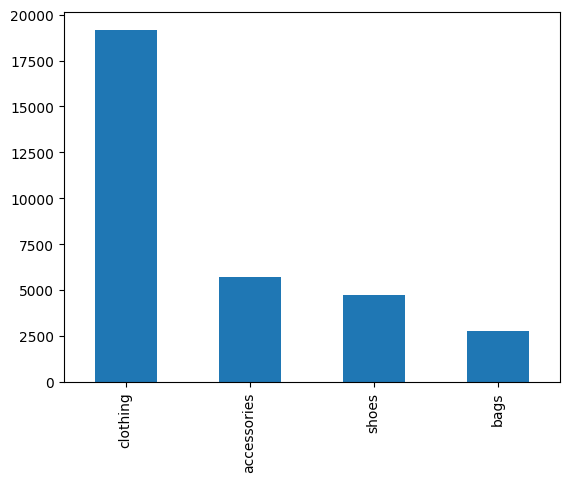

In [47]:
print('Country, Gender and Category counts are inline with what is expected')
ounass.country.value_counts().plot.bar()
plt.show()
print('Curated for All and Kids need to be dropped')
ounass.gender.value_counts().apply(lambda x: x/4).plot.bar()
plt.show()
ounass.category.value_counts().apply(lambda x: x/4).plot.bar()

Top Brands
Brands to be selectd for final table: ['Balenciaga', 'SAINT LAURENT', 'Bottega Veneta', 'Dolce & Gabbana', 'Emporio Armani', 'Gucci', 'Valentino Garavani', 'Alexander McQueen', 'Coach', 'Armani Exchange']


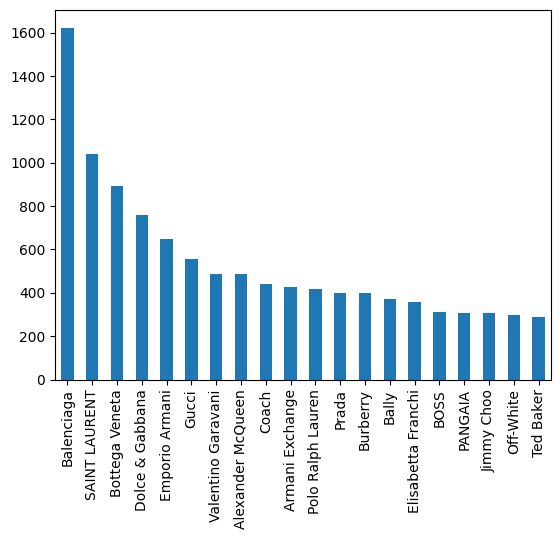

In [90]:
print('Top Brands')
ounass.brand.value_counts().apply(lambda x: x/4)[:20].plot.bar()
print(f'Brands to be selectd for final table: {(list(ounass.brand.value_counts().index[:10]))}')
top_ounass = list(ounass.brand.value_counts().index[:11])

In [50]:
print('price needs to be converted to string')
ounass.price.head(3)

price needs to be converted to string


0      825
1    3,550
2    1,000
Name: price, dtype: object

# Farfetch EDA

In [55]:
farfetch = pd.read_json('../resources/farfetch.json', lines=True)

In [65]:
print('Price needs to be changed int, text needs to be changed to string')
print(farfetch.dtypes)
farfetch['text'] = farfetch['text'].apply(lambda x: '. '.join(x))

Price needs to be changed int, text needs to be changed to string
site              object
crawl_date         int64
country           object
url               object
subfolder         object
portal_itemid     object
product_name      object
gender            object
brand             object
category          object
subcategory       object
price             object
currency          object
price_discount    object
sold_out            bool
primary_label     object
image_url         object
text              object
dtype: object


In [66]:
print("Let's check for duplicates: Duplicates need to be dropped")
print(farfetch.url.duplicated().value_counts())
farfetch = farfetch.drop_duplicates()


Let's check for duplicates: Duplicates need to be dropped
False    990426
True     731037
Name: url, dtype: int64


In [72]:
print('Category urls need to be removed')
list(farfetch.url)[:10]

Category urls need to be removed


['https://www.farfetch.com/ae/shopping/men/shoes-2/items.aspx',
 'https://www.farfetch.com/sa/shopping/men/shoes-2/items.aspx',
 'https://www.farfetch.com/sa/shopping/women/shoes-1/items.aspx',
 'https://www.farfetch.com/ae/shopping/women/bags-purses-1/items.aspx',
 'https://www.farfetch.com/ae/shopping/women/shoes-1/items.aspx',
 'https://www.farfetch.com/qa/shopping/men/bags-purses-2/items.aspx',
 'https://www.farfetch.com/ae/shopping/men/bags-purses-2/items.aspx',
 'https://www.farfetch.com/sa/shopping/women/bags-purses-1/items.aspx',
 'https://www.farfetch.com/ae/shopping/men/burberry-logo-patch-open-toe-slides-item-18539722.aspx?storeid=11115',
 'https://www.farfetch.com/sa/shopping/men/bags-purses-2/items.aspx']

In [74]:
print("Let's check for null values: Pages with null brand, product, category, subcategory, price, currency \
and image_url need to be removed.")
print(farfetch.isna().sum())

Let's check for null values: Pages with null brand, product, category, subcategory, price, currency and image_url need to be removed.
site                   0
crawl_date             0
country                0
url                    0
subfolder              0
portal_itemid          0
product_name        3354
gender                 0
brand               3390
category            4221
subcategory         4221
price               4220
currency            4220
price_discount    990441
sold_out               0
primary_label     295482
image_url           4221
text                   0
dtype: int64


In [75]:
farfetch = farfetch[~farfetch.currency.isna()]

Country, Gender and Category counts are inline with what is expected


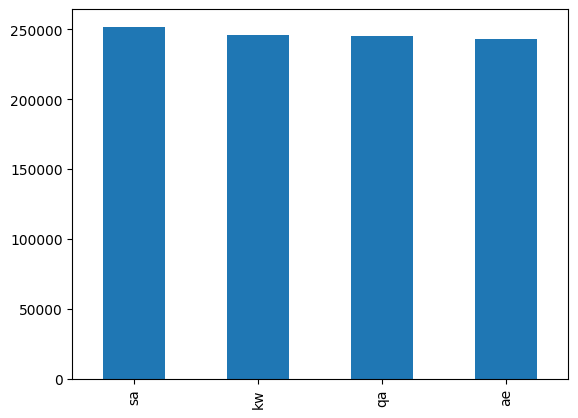

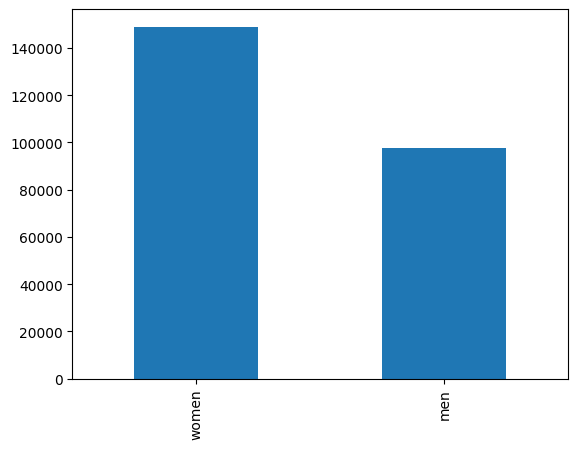

Clothing, Shoes, Bags to remain and rest to be removed


<AxesSubplot:>

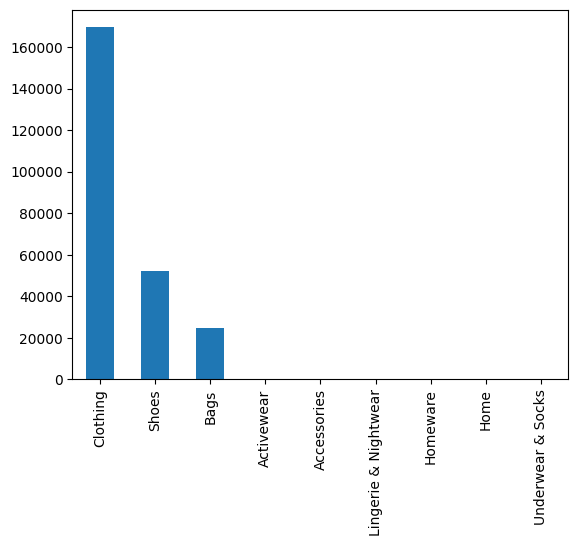

In [78]:
print('Country, Gender and Category counts are inline with what is expected')
farfetch.country.value_counts().plot.bar()
plt.show()
farfetch.gender.value_counts().apply(lambda x: x/4).plot.bar()
plt.show()
print('Clothing, Shoes, Bags to remain and rest to be removed')
farfetch.category.value_counts().apply(lambda x: x/4).plot.bar()

Top Brands


<AxesSubplot:>

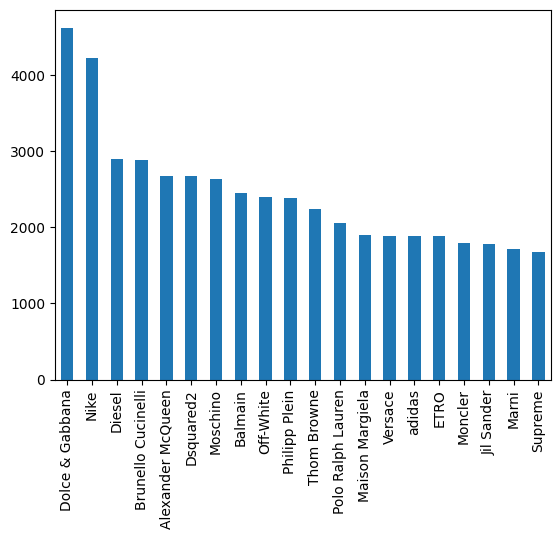

In [79]:
print('Top Brands')
farfetch.brand.value_counts().apply(lambda x: x/4)[:20].plot.bar()

In [91]:
print('Intersection of top brand names between Farfetch and Ounass')
print([x for x in top_ounass if x in farfetch.brand.unique()])

Intersection of top brand names between Farfetch and Ounass
['Balenciaga', 'Dolce & Gabbana', 'Emporio Armani', 'Gucci', 'Valentino Garavani', 'Alexander McQueen', 'Coach', 'Armani Exchange', 'Polo Ralph Lauren']


In [92]:
print('We need to rename SAINT LAURENT to Saint Laurent for final table and omit Bottega since not sold on Farfetch')
print([x for x in top_ounass if x not in farfetch.brand.unique()])

We need to rename SAINT LAURENT to Saint Laurent for final table and omit Bottega since not sold on Farfetch
['SAINT LAURENT', 'Bottega Veneta']


In [99]:
brand_key = pd.DataFrame()
brand_key['brand_key'] = [x for x in top_ounass if x != 'Bottega Veneta']
brand_key['ounass_brand_name'] = [x for x in top_ounass if x != 'Bottega Veneta']
brand_key['farfetch_brand_name'] = [x.replace('Saint Laurent', 'SAINT LAURENT') for x in top_ounass \
                                    if x != 'Bottega Veneta']
brand_key

,brand_key,ounass_brand_name,farfetch_brand_name
0,Balenciaga,Balenciaga,Balenciaga
1,SAINT LAURENT,SAINT LAURENT,SAINT LAURENT
2,Dolce & Gabbana,Dolce & Gabbana,Dolce & Gabbana
3,Emporio Armani,Emporio Armani,Emporio Armani
4,Gucci,Gucci,Gucci
5,Valentino Garavani,Valentino Garavani,Valentino Garavani
6,Alexander McQueen,Alexander McQueen,Alexander McQueen
7,Coach,Coach,Coach
8,Armani Exchange,Armani Exchange,Armani Exchange
9,Polo Ralph Lauren,Polo Ralph Lauren,Polo Ralph Lauren


In [101]:
print('Save brand_key and upload to Redshift')
brand_key.to_csv('../resources/brand_key.csv', index=False)

Save brand_key and upload to Redshift


In [102]:
del ounass
del farfetch